# Welcome to ID of MBL

We have assembled the code neccessary for repuducing our plots from the paper

In [1]:
# packages
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils_paper import *
import fssa

### Problem Sketch
If we have points laying in a 3-dimensional coordinate system but confined to a plane, the extrinsic dim. is 3 but the intrinsic dim. is 2.

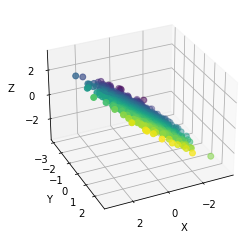

In [2]:
make_problem_sketch()

### Generating data

In [3]:
L, seeds, location = 8, 100, 'data'
min_disorder, max_disorder, steps = 0.5, 5.5, 11
ws=np.linspace(min_disorder, max_disorder, steps)

#buildDiagSave(L, seeds, min_disorder, max_disorder, steps, method = 'dense', location = 'data')

### EigenComponent Dominance
We may investigate whether there is a change in intrinsic dimension across the phase transition by looking at the weight distribution within eigenvectors. A decrease in intrinsic dimension is indicated by a consolidation of weight in an eigenvector.

In [4]:
means, maxs, lims = eigenC_analysis(num_lims=8, seeds=seeds, L=L,
                                    min_disorder=min_disorder, max_disorder=max_disorder, steps=steps)

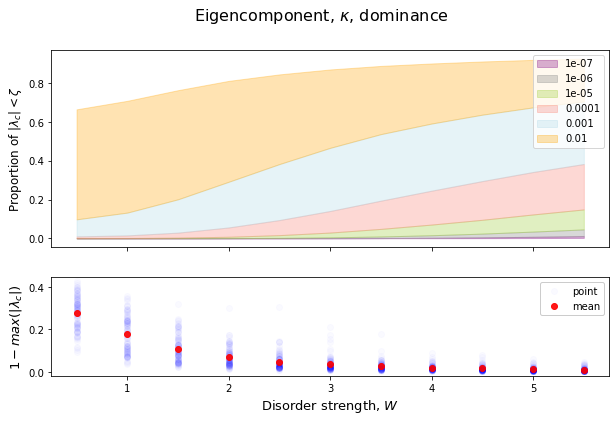

In [5]:
eigenC_plots(means=means, maxs=maxs, lims=lims, seeds=seeds,L=L,
             colors = 'orange, lightblue, salmon, yellowgreen, grey, purple'.split(', ')[::-1],
             min_disorder=min_disorder, max_disorder=max_disorder, steps=steps)

### 2NN
2NN is a neighbour graph algo. which determines the intrinsic dimension of a dataset -- when applied to a list of eigenvectors corresponding to one realization of a single disorder strength.

In [ ]:
filename = location+'/results-L-{L}-W-{W}-seed-{seed}.npz'.format(L=8, W=ws[0], seed=0)
eigs = load_eigs(filename, 'vecs')
x,y,slope = nn2(eigs, plot=True, return_xy=True)

loss = L2_loss_linear_originBound(x,y,slope)
weight = weigt_from_loss(loss)
print(loss, weight)

In [ ]:
slope_loss_and_weight = get_slope_loss_and_weight(ws=ws, seeds=seeds, L=L, location='data/')

In [ ]:
plot_ID_weights(slope_loss_and_weight, L, seeds, ws)

### 2NN averaging
By performing 2NN on eigenvectors from many disorder strengths and averaging across many realization, we obtain a general trend. 

We can improve results by including a weight when averaging. The weight is determined by the quality of individual 2NN fits.

In [ ]:
weighted_averages = []
for i in range(len(ws)):
    weighted_averages.append(weighted_average_m1(slope_loss_and_weight[i,:,0], slope_loss_and_weight[i,:,2]))
    
np.save('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)),weighted_averages, allow_pickle=True)


fig, ax = plt.subplots(1,2)
for L in [8,10,12]:
    ax[0].plot(ws,np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws))), label=L)
    ax[1].plot(ws,np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)))/L, label=L)
plt.legend()
[ax[i].set_xlabel('Disorder Strength', fontsize=13) for i in range(2)]
ax[0].set_ylabel('weighted average ID', fontsize=13)
ax[1].set_ylabel('weighted average ID/L', fontsize=13)

fig.suptitle('ID from 2nn weigted average, seeds={}, ws={}'.format(L,seeds,len(ws)), fontsize=16)
plt.tight_layout()
plt.show()

## 5. Scaling collapse
To obtain the critical disorder strength, we may collapse the fits from **4.**

### 5.1. Scaling Template

see: https://pyfssa.readthedocs.io/en/stable/tutorial.html

In [ ]:
# Load data (weigted averages)
weighted_averages = []
for L in [8,10,12]:
    data = np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)))
    #plt.plot(ws,data, label=L)
    weighted_averages.append(data)
print(weighted_averages)

weighted_averages = np.array(weighted_averages)
scale_collapse2(weighted_averages, ws), weighted_averages.shape

In [ ]:
# Load data (weigted averages)
weighted_averages = []
for L in [8,10,12]:
    data = np.load('data/weighted_averages-L={}-seeds={}-ws={}.npy'.format(L,seeds,len(ws)))
    #plt.plot(ws,data, label=L)
    weighted_averages.append(data/L)
print(weighted_averages)

weighted_averages = np.array(weighted_averages)
scale_collapse2(weighted_averages, ws), weighted_averages.shape


## Lets have a look at the dataobtained from the cluster

In [ ]:
L = 10
filename = '../fullresults/2nn-{}-combined.npy'.format(L)
data = np.load(filename)
print(data.shape)

print("We can't do a weighted average here, because we didnt note the quality of the fits (2nn)")

In [ ]:
ws2 = np.linspace(0.1,6.1,31)
Ls = [8,10,12,14]
ID_mean = np.zeros((len(Ls),len(ws2)))
for index, L in enumerate(Ls):
    filename = '../fullresults/2nn-{}-combined.npy'.format(L)
    data = np.load(filename)
    averaged = np.mean(data,axis=0)
    ID_mean[index] = averaged
    plt.plot(ws2,averaged, label = L)
plt.legend()
plt.xlabel('Disorder Strength', fontsize=13)
plt.ylabel('weighted average ID', fontsize=13)

plt.title('ID from 2nn from cluster', fontsize=16)
plt.show()

In [ ]:
skip_init = 3


scale_collapse2(ID_mean[:,skip_init:], ws2[skip_init:], Ls)



## 6. Degeneracy mitigation
* does it have to be the **nearest** neighbours?

* I have done a little in this regard -- namely weighted averaging
* Alternatively; we could discriminate against very near neighbours --> either by exclusion, or by diminished weight.

hmmm so that didnt work

In [ ]:
## Try TSNE